# Practical 1
## benchmarking, the golden measure, speed-up

In [1]:
using Pkg

#_____________Uncomments the packages below once they have been installed________
using WAV
using Plots
using TickTock
using Statistics
using BenchmarkTools
using CSV, Tables

In [2]:
#this function installs all packages needed to run this script
function installFunc()
	Pkg.add("WAV")
	Pkg.add("Plots")
	Pkg.add("TickTock")
	Pkg.add("Statistics")
    Pkg.add("BenchmarkTools")
	print("------Packages Installed---------")
	print(Pkg.status())
end

installFunc (generic function with 1 method)

In [2]:
#this function calculates speed-up
function speedUp(Tp1, Tp2)
    return Tp1/Tp2
end

#this function generate a single random number at a time and append it to an array
function createwhiten(N)
    whiten = zeros(0)
    for i in range(1, N*4800)
        append!(whiten, rand()*2 - 1)
    end    
    return whiten
end

#this function calculates mean of a data set
function mean(x)
    x_ = 0;
    for i in x
        x_ = x_ + i
    end
    return x_/length(x)
end

#this function calculates correlation between two datasets
function corr(x , y)
    x_mean = mean(x)
    y_mean = mean(y)
    
    x_temp = 0
    y_temp = 0
    
    numerator = 0
    denominator = 0
    
    for i in range(1, length(x))
        x_ = x[i] - x_mean
        y_ = y[i] - y_mean
        
        numerator = numerator + x_ * y_
        
        x_temp = x_temp + x_^2
        y_temp = y_temp + y_^2
    end
    
    x_temp = sqrt(x_temp)
    y_temp = sqrt(y_temp)
    
    denominator = x_temp * y_temp

    return numerator/denominator
end

corr (generic function with 1 method)

## Measuring Execution Time of rand()

In [8]:
#test parameters
N = 10
durations = [1, 2, 3, 4, 5, 6,7,8,9,10,11,12,13,14,15,16,17,18,19,20]

tot_t1 = 0
tot_t2 = 0

m_data = zeros(0)
s_data = zeros(0)
sampl = zeros(0)

whiteNoise = zeros(0)
whiten = zeros(0)

for DURATION in durations
#measuring for genearting a multiple random value
for i in range(1, N)
    t = @elapsed begin
        whiteNoise = (rand(4800*DURATION)*2).-1
    end
    tot_t1 += t
end

#measuring for genearting a single random value
for i in range(1, N)
    t = @elapsed begin
        whiten = createwhiten(DURATION);
    end
    tot_t2 += t
end
append!(m_data, tot_t1/N)
append!(s_data, tot_t2/N)
append!(sampl, length(whiten))
end

data = [sampl m_data s_data]
# Write the matrix to a CSV file
CSV.write("noise_speed.csv", Tables.table(data), header=["Samples", "Multiple", "Single"])
plot(sampl , m_data, label="Multiple")
plot!(sampl, s_data, label="Singile")
xlabel!("Sample size")
ylabel!("Execution time")
title!("Execution time for white noise generators")
savefig("noise-execution.png")

"C:\\Users\\chauk\\OneDrive\\Documents\\Final Year\\EEE4120F\\EEE4120F-PRACTICALS\\Prac1\\noise-execution.png"

## Generating White Noise
### Mutliple random number generated noise

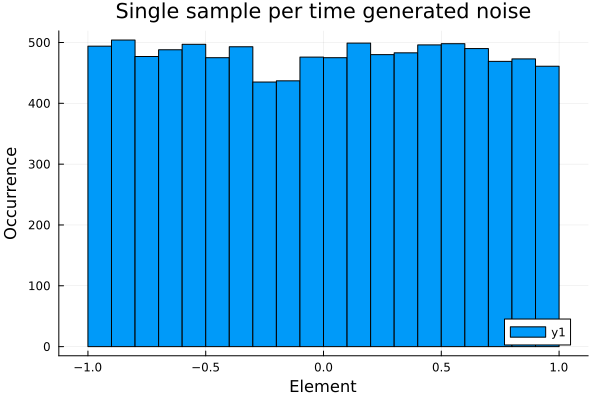

9600

In [4]:
DURATION = 2
whiteNoise = (rand(4800*DURATION)*2).-1

h = Plots.histogram(whiteNoise, xlabel="Element", ylabel="Occurrence", title="Single sample per time generated noise")
Plots.display(h)
savefig("m-hist.png")

print(length(whiteNoise))

WAV.wavwrite(whiteNoise, "white_noise/whiteNoise1.wav", Fs=4800) #sample freq is 4800Hz

### Single random number generated noise

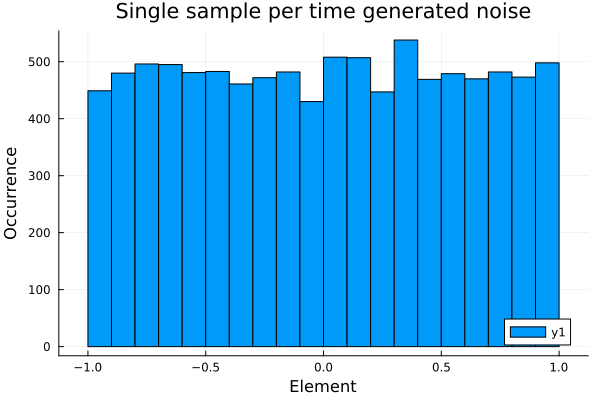

9600

In [5]:
whiten = createwhiten(DURATION); #this will create DURATION seconds of white noise

h = Plots.histogram(whiten, xlabel="Element", ylabel="Occurrence", title="Single sample per time generated noise")
Plots.display(h)
savefig("s-hist.png")

print(length(whiten))
    
WAV.wavwrite(whiten, "white_noise/whiteNoise2.wav", Fs=4800) #sample freq is 4800Hz

## Testing Pearson's Correlation Implematation to Built-in Correlation Function

In [7]:
r_corr = corr(whiten, whiten)
println("Correlation of whiten using corr() = "*string(r_corr))
r_cor = cor(whiten, whiten)
println("Correlation of whiten using cor() = " *string(r_cor))

r_corr = corr(whiten, whiteNoise)
println("Correlation of whiten and whiteNoise using corr() = "*string(r_corr))
r_cor = cor(whiten, whiteNoise)
println("Correlation of whiten and whiteNoise using cor() ="*string(r_cor))


Correlation of whiten using corr() = 1.0
Correlation of whiten using cor() = 1.0
Correlation of whiten and whiteNoise using corr() = -0.005760550490716248
Correlation of whiten and whiteNoise using cor() =-0.005760550490716234


## Comparing Pearson’s Correlation  Implementation to the Built-in Correlation Function

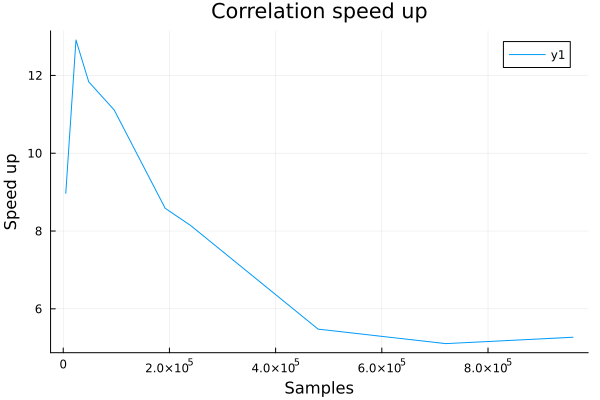

In [11]:
SAMPLES = [1, 5, 10, 20, 40, 50, 100, 150, 200]
N = 10

a = 0
b = 0

corr_results = zeros(0)
cor_results = zeros(0)

sampl = zeros(0)
speed_up = zeros(0)

for samples in SAMPLES
    tot_t1 = 0
    tot_t2 = 0
    
    for i in range(1, N)
        
        #generate data
        whiten = createwhiten(samples)
        whiteNoise = (rand(4800*samples)*2).-1
        
        #measure time for corr
        t = @elapsed begin
        a = corr(whiten, whiteNoise)
        end
        tot_t1 += t
        
        #measure time for corr
        t = @elapsed begin
        b = cor(whiten, whiteNoise)
        end
        tot_t2 += t
        
    end
    
    Tp1 = tot_t1/N    
    Tp2 = tot_t2/N
    
    append!(sampl, length(whiten))
    append!(speed_up, speedUp(Tp1, Tp2))
    
    append!(corr_results, a)
    append!(cor_results, b)
        
end

data = [sampl corr_results cor_results]
# Write the matrix to a CSV file
CSV.write("cor_speed.csv", Tables.table(data), header=["Samples", "Corr", "Cor"])

plot(sampl, speed_up, xlabel = "Samples", ylabel = "Speed up", title="Correlation speed up")
#savefig("speedup.png")

In [36]:
sample_size = 10000
freq = 2
time_shift = range(1, stop=750, step = 1)

x = []
y = []

cor_data = zeros(0)
cor_data1 = zeros(0)
cor_data2 = zeros(0)

for shift in time_shift
    x = range(0, stop=2π, length=sample_size)
    y = sin.(2π * freq * x)
    y_shifted = circshift(y, shift)
    append!(cor_data, cor(y, y_shifted))
end
plot(time_shift, cor_data, label="freq = $freq")
    
freq = 4
for shift in time_shift
    x = range(0, stop=2π, length=sample_size)
    y = sin.(2π * freq * x)
    y_shifted = circshift(y, shift)
    append!(cor_data1, cor(y, y_shifted))
end
plot!(time_shift, cor_data1, label="freq = $freq")
        
freq = 10
for shift in time_shift
    x = range(0, stop=2π, length=sample_size)
    y = sin.(2π * freq * x)
    y_shifted = circshift(y, shift)
    append!(cor_data2, cor(y, y_shifted))
end
    
plot!(time_shift, cor_data2, label="freq = $freq")
xlabel!("Time shift")
ylabel!("Correlation")
title!("Time shift vs frequency correlation relationship")
savefig("timeshift.png")

"C:\\Users\\chauk\\OneDrive\\Documents\\Final Year\\EEE4120F\\EEE4120F-PRACTICALS\\Prac1\\timeshift.png"

In [10]:
sample_sizes = [100, 1000, 10000]
freqs = [1, 2, 3, 4,10]
shifts = [10, 20, 30]
cor_data = zeros(0)
h = 0


for freq in freqs
    plots = []
for sample_size in sample_sizes
    x = range(0, stop=2π, length=sample_size)
    y = sin.(2π * freq * x)
    for shift in shifts
        y_shifted = circshift(y, shift)
        h = cor(y, y_shifted)
        append!(cor_data, h)
        push!(plots, scatter(x, [y,y_shifted], label="Cor = $h Shift = $shift"))
    end
end
plot(plots..., layout=(3,3), legend=:bottomright, size=(1024 , 768),
    xlabel="Time", ylabel="Amplitude",
    title="Sine waves of $freq Hz")
filename = "fig-"*string(freq)*".png"
savefig(filename)
end

In [11]:
println(cor_data)

[-0.6306080355918806, 0.08512972914581318, 0.29159150877038414, 0.9175453044472016, 0.7039068684626724, 0.39349689545730665, 0.9983014504257939, 0.9951246006216976, 0.9904779775362372, -0.1824903549672151, -0.665644661580242, 0.4595467640396294, 0.7020990358625246, 0.0016097246218593347, -0.6735650457378166, 0.9966869384086481, 0.9871136807806344, 0.9713642762311958, 0.806928175455075, 0.30781040502197027, -0.30668635042423303, 0.36630997365876167, -0.7242894213148268, -0.8968076799456913, 0.992262474106425, 0.9704431217259913, 0.9348627689184603, -0.8124144200570605, 0.6279821210241234, -0.47446964981725975, -0.0034271017324682476, -0.991029664240205, 0.006086637588017328, 0.9871085482828305, 0.9498987791518001, 0.8893045129162577, -0.4302260890193897, -0.26230303913766934, 0.41338521715136584, -0.6832624850211781, -0.061904981235259136, 0.7651173943501148, 0.9220731764906657, 0.7018021873371779, 0.37334208860666457]


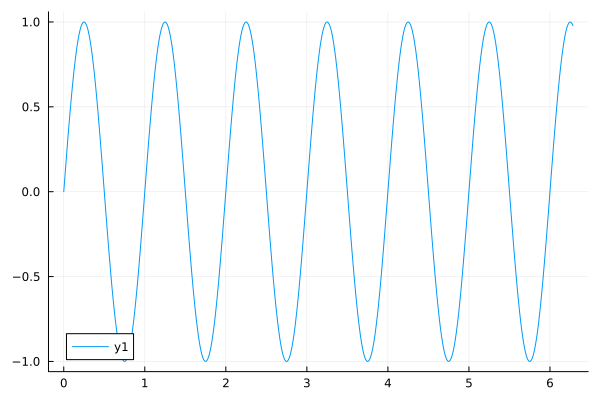

In [31]:
x = []
y = []
cor_data = zeros(0)
sample_size = 750
freq = 1
for shift in time_shift
    x = range(0, stop=2π, length=sample_size)
    y = sin.(2π * freq * x)
    y_shifted = circshift(y, shift)
    append!(cor_data, cor(y, y_shifted))
end
plot(x,y)

750
750


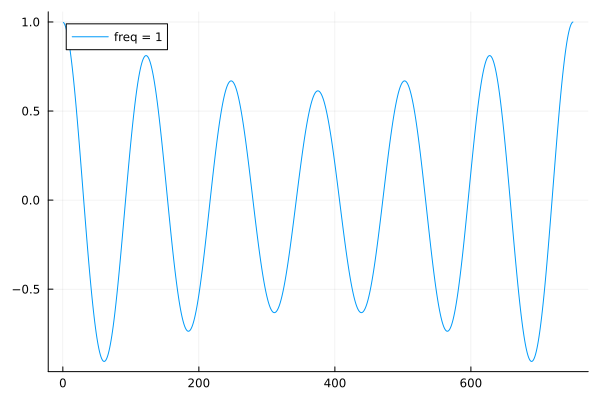

In [33]:
println(length(cor_data))
println(length(time_shift))
plot(time_shift, cor_data, label="freq = $freq")